# PyMongo

* MongoDB is a popular NoSQL database
    * It stores data in JSON-like documents
* To use MongoDB with python the official driver published by devolopers is PyMongo

## Terminology

* **JSON** - JavaScript Object Notation
* **Document**
    - Key value pairs
    - Stored as BSON which is a binary representation of JSON
* **Collection** 
    - Table in an SQL database
    - Group of documents stored in a database

## Installation

* You will need to install PyMongo on your device
    * ```python 
    pip install pymongo``` 
    * This will only need to be done once on your machine and then you can import the library

In [1]:
import pymongo

* You also need to have MongoDB installed on you machine.
    * **MacOS** 
        - Use `/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"` to install Homebrew
            - `brew tap mongodb/brew`
            - `brew install mongodb-community@3.4`
        - Running MongoDB
            - `brew services start mongodb-community@3.4`
    * **Windows** https://docs.mongodb.com/v3.4/tutorial/install-mongodb-on-windows/ 

## Connection

* We can create a connection with default values where Host = LocalHost and Port = 27017
```python
MongoClient()```
* We can explicitly set them
    * ```python
MongoClient('localhost', 27017)```
    * ```python
MongoClient('mongodb://localhost:27017')```

In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient() 

In [4]:
client.HOST

'localhost'

In [5]:
client.PORT

27017

## Accessing database

* **NOTE** database is not created until it gets content
* Create a database using the following
```python 
db = client.MyDatabaseName
```
or
```python
db = client['MyDatabaseName']
```

In [6]:
db = client.pymongo_testDB

In [7]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'pymongo_testDB')

In [8]:
if 'pymongo_testDB' in client.list_database_names():
    print('Database exists')
    
# no content so does not exist yet

## Inserting documents

* Specify which collection
    * `.posts` 
* Insert data into the collection
    * `.insert_one()`
    * `.insert_many()`

In [9]:
posts = db.posts

In [10]:
post_data = {
    'title': 'PyMongo',
    'course': 'Software Development'
}

result = posts.insert_one(post_data)
print(result)

In [11]:
result.inserted_id

ObjectId('5e626848b8b8ba1208d1a483')

In [2]:
if 'pymongo_testDB' in client.list_database_names():
    print('Database exists')
    
# It now exists as it has some content

NameError: name 'client' is not defined

In [13]:
post_data1 = {
    'title': 'AI',
    'course': 'Software Development'
}
post_data2 = {
    'title': 'Big Data',
    'course': 'Software Development'
}

In [14]:
result_many = posts.insert_many([post_data1, post_data2])
print(result_many.inserted_ids)

[ObjectId('5e626848b8b8ba1208d1a484'), ObjectId('5e626848b8b8ba1208d1a485')]


In [15]:
post_data3 = {
    'title': 'Python',
    'course': 'Software Development',
    'author': 'Unknown'
}

In [16]:
res = posts.insert_one(post_data3)
print(res.inserted_id)

5e626848b8b8ba1208d1a486


In [17]:
math_posts = [
    {'title': 'Linear Algebra', 'course': 'Mathematics'},
    {'title': 'Calculus', 'course': 'Mathematics'}
]

res2 = posts.insert_many(math_posts)
print(res2.inserted_ids)

[ObjectId('5e626848b8b8ba1208d1a487'), ObjectId('5e626848b8b8ba1208d1a488')]


# Retrieve documents

* `find_one()`
* `find()`

In [18]:
unkwn_p = posts.find_one({'author' : 'Unknown'})
print(unkwn_p)

{'_id': ObjectId('5e626848b8b8ba1208d1a486'), 'title': 'Python', 'course': 'Software Development', 'author': 'Unknown'}


In [19]:
posts.count_documents({})

6

In [20]:
import pprint

In [21]:
for post in posts.find():
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a483'),
 'course': 'Software Development',
 'title': 'PyMongo'}


{'_id': ObjectId('5e626848b8b8ba1208d1a484'),
 'course': 'Software Development',
 'title': 'AI'}


{'_id': ObjectId('5e626848b8b8ba1208d1a485'),
 'course': 'Software Development',
 'title': 'Big Data'}


{'_id': ObjectId('5e626848b8b8ba1208d1a486'),
 'author': 'Unknown',
 'course': 'Software Development',
 'title': 'Python'}


{'_id': ObjectId('5e626848b8b8ba1208d1a487'),
 'course': 'Mathematics',
 'title': 'Linear Algebra'}


{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Mathematics',
 'title': 'Calculus'}




In [22]:
for post in posts.find({'course':'Mathematics'}):
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a487'),
 'course': 'Mathematics',
 'title': 'Linear Algebra'}


{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Mathematics',
 'title': 'Calculus'}




In [23]:
for post in posts.find({'title':{'$regex':'Py'}}):
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a483'),
 'course': 'Software Development',
 'title': 'PyMongo'}


{'_id': ObjectId('5e626848b8b8ba1208d1a486'),
 'author': 'Unknown',
 'course': 'Software Development',
 'title': 'Python'}




In [24]:
for post in posts.find().sort('title'):
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a484'),
 'course': 'Software Development',
 'title': 'AI'}


{'_id': ObjectId('5e626848b8b8ba1208d1a485'),
 'course': 'Software Development',
 'title': 'Big Data'}


{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Mathematics',
 'title': 'Calculus'}


{'_id': ObjectId('5e626848b8b8ba1208d1a487'),
 'course': 'Mathematics',
 'title': 'Linear Algebra'}


{'_id': ObjectId('5e626848b8b8ba1208d1a483'),
 'course': 'Software Development',
 'title': 'PyMongo'}


{'_id': ObjectId('5e626848b8b8ba1208d1a486'),
 'author': 'Unknown',
 'course': 'Software Development',
 'title': 'Python'}




# Deleting 

* `delete_one()` - deletes first occurence of a document
* `delete_many()` - deletes multiple documents

In [25]:
posts.count_documents({})

6

In [26]:
posts.delete_one({'course':'Mathematics'})

In [27]:
posts.count_documents({})

5

In [28]:
for post in posts.find({'course':'Mathematics'}):
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Mathematics',
 'title': 'Calculus'}




In [29]:
posts.delete_many({'author':'Unknown'})

In [30]:
posts.count_documents({})

4

In [31]:
for post in posts.find({'author':'Unknown'}):
    pprint.pprint(post)
    print('\n')

In [32]:
for post in posts.find():
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a483'),
 'course': 'Software Development',
 'title': 'PyMongo'}


{'_id': ObjectId('5e626848b8b8ba1208d1a484'),
 'course': 'Software Development',
 'title': 'AI'}


{'_id': ObjectId('5e626848b8b8ba1208d1a485'),
 'course': 'Software Development',
 'title': 'Big Data'}


{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Mathematics',
 'title': 'Calculus'}




# Update

* `update_one()` - only first occurence is updated
* `update_many()` - all occurences updated

In [33]:
# query = {'course':'Mathematics'}
# new_val = {'$set':{'course':'Maths'}}
# posts.update_one(query, new_val)

posts.update_one({'course':'Mathematics'}, {'$set':{'course':'Maths'}})

In [34]:
for post in posts.find():
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a483'),
 'course': 'Software Development',
 'title': 'PyMongo'}


{'_id': ObjectId('5e626848b8b8ba1208d1a484'),
 'course': 'Software Development',
 'title': 'AI'}


{'_id': ObjectId('5e626848b8b8ba1208d1a485'),
 'course': 'Software Development',
 'title': 'Big Data'}


{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Maths',
 'title': 'Calculus'}




In [35]:
query2 = {'title':'AI'}
new_val2 = {'$set':{'title':'Artificial Intelligence'}}
posts.update_many(query2, new_val2)

In [36]:
for post in posts.find():
    pprint.pprint(post)
    print('\n')

{'_id': ObjectId('5e626848b8b8ba1208d1a483'),
 'course': 'Software Development',
 'title': 'PyMongo'}


{'_id': ObjectId('5e626848b8b8ba1208d1a484'),
 'course': 'Software Development',
 'title': 'Artificial Intelligence'}


{'_id': ObjectId('5e626848b8b8ba1208d1a485'),
 'course': 'Software Development',
 'title': 'Big Data'}


{'_id': ObjectId('5e626848b8b8ba1208d1a488'),
 'course': 'Maths',
 'title': 'Calculus'}




# Pandas

* We use pandas for Data Manipulation
* You can easily read you database into a Dataframe
    * From the dataframe we can analyse the data 
    * Feature engineering, Variable selection
    * Create relevant visualisations
    * Clean data so we are able to use it for our AI model

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.DataFrame(list(posts.find()))
df

,_id,course,title
0,5e626848b8b8ba1208d1a483,Software Development,PyMongo
1,5e626848b8b8ba1208d1a484,Software Development,Artificial Intelligence
2,5e626848b8b8ba1208d1a485,Software Development,Big Data
3,5e626848b8b8ba1208d1a488,Maths,Calculus


In [39]:
samp = len(list(df.index))

* We are generating some random data to insert into our dataframe

In [40]:
np.random.seed(42)

In [41]:
df['Score'] = np.random.normal(60, 20, samp)

In [42]:
df

,_id,course,title,Score
0,5e626848b8b8ba1208d1a483,Software Development,PyMongo,69.934283
1,5e626848b8b8ba1208d1a484,Software Development,Artificial Intelligence,57.234714
2,5e626848b8b8ba1208d1a485,Software Development,Big Data,72.953771
3,5e626848b8b8ba1208d1a488,Maths,Calculus,90.460597


# Visualisation

* Useful for exploration of data

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

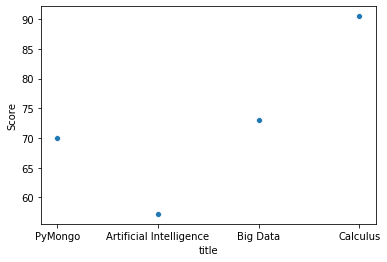

In [56]:
sns.scatterplot('title', 'Score', data=df)

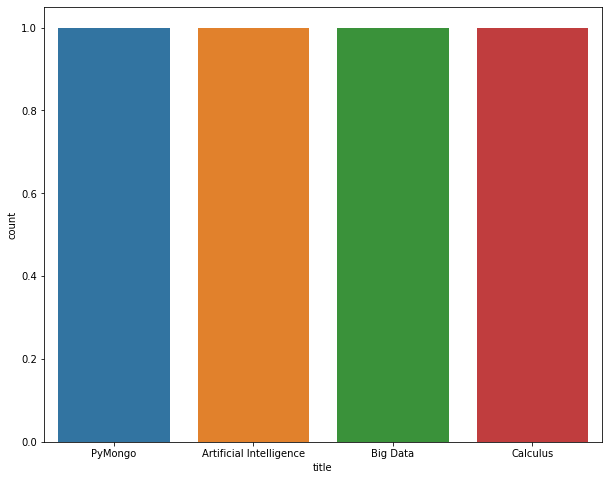

In [44]:
plt.figure(figsize = (10,8))
sns.countplot(df['title'],)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
_id       4 non-null object
course    4 non-null object
title     4 non-null object
Score     4 non-null float64
dtypes: float64(1), object(3)
memory usage: 208.0+ bytes


In [46]:
df.describe(include='all')

,_id,course,title,Score
count,4,4,4,4.000000
unique,4,2,4,NaN
top,5e626848b8b8ba1208d1a484,Software Development,Artificial Intelligence,NaN
freq,1,3,1,NaN
mean,NaN,NaN,NaN,72.645841
std,NaN,NaN,NaN,13.690821
min,NaN,NaN,NaN,57.234714
25%,NaN,NaN,NaN,66.759391
50%,NaN,NaN,NaN,71.444027
75%,NaN,NaN,NaN,77.330477


# Delete entire Database

* `drop_database()` - will delete the entire database
* `drop_many({})` - with no areguments will delete all documents from the database

In [47]:
client.drop_database('pymongo_testDB')